# Cambio de variable u
## integral 3: con potencial efectivo evaluado con cambio de variable
### derivada a: ajuste 13

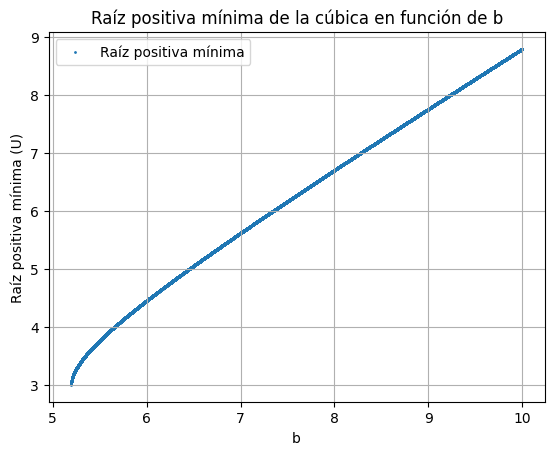

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los coeficientes de ecuación cúbica
def coeficientes_cubica(b, m):
    # Ecuación cubica: r^3 - b^2*r + 2mb^2 = 0
    return [1, 0, -b**2, 2*m*b**2]

# Parámetros usando definición de b 
m = 1
inicio = 3 * (3**(1/2)) * m
fin = 10 * m
paso = 0.0001
valores_b = np.arange(inicio, fin, paso)


# Lista para almacenar las raíces positivas más pequeñas
valores_r_minima = []

#Para cada valor de se resuelve ecuacion cubica para u
for b in valores_b:
    coefs = coeficientes_cubica(b, m)
    # Encontrar todas las raíces (reales y complejas)
    raices = np.roots(coefs)
    # Filtrar raíces reales positivas
    raices_reales_positivas = raices[np.isreal(raices) & (raices.real > 0)].real
    # Seleccionar la raíz positiva más pequeña si existe
    if len(raices_reales_positivas) > 0:
        raiz_minima = max(raices_reales_positivas)
        valores_r_minima.append(raiz_minima)
    else:
        # Si no hay raíces positivas, agregar NaN
        valores_r_minima.append(np.nan)

# Graficar los resultados
valores_r_minima = np.array(valores_r_minima)
plt.scatter(valores_b, valores_r_minima, label="Raíz positiva mínima", s=1)
plt.xlabel("b")
plt.ylabel("Raíz positiva mínima (U)")
plt.title("Raíz positiva mínima de la cúbica en función de b")
plt.legend()
plt.grid()
plt.show()

# Calculo de angulos de dispersión 
$\theta = 2 \int_{0}^{1} \frac{du}{\sqrt{\frac{R^2}{4u^2b^2}-\frac{R^2}{4 u^2 b^2E^2 } V(R/1-u^2)}} - \pi$


C:\Users\esme_\AppData\Local\Temp\ipykernel_13584\2438509821.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  valor_integral, _ = quad(integrando, 0, 1, args=(R,b,m))


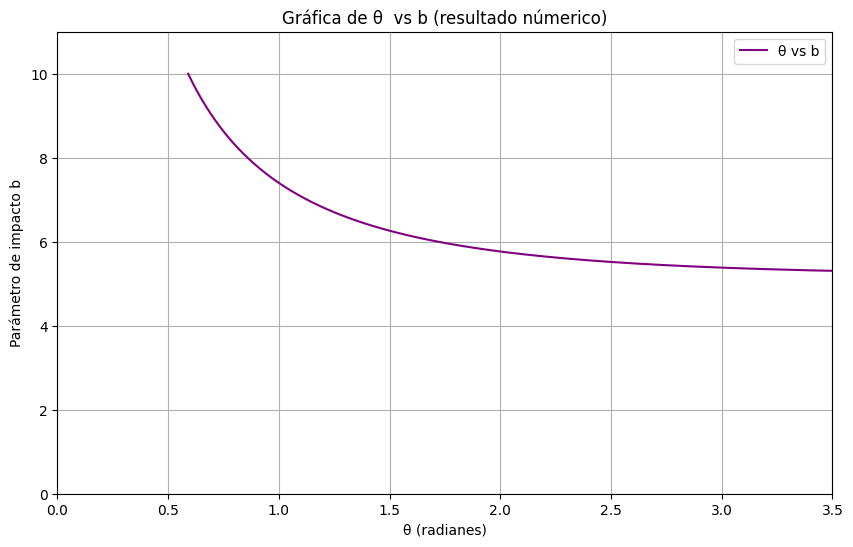

In [2]:
#libreria para calculo numerico
import numpy as np
#para graficar
import matplotlib.pyplot as plt
# para resolver integral definida
from scipy.integrate import quad
# para resolver ecuacion (encontrar raices)en este caso R's
from scipy.optimize import fsolve

E = 1.0
def V(R, u, m, b, E):
    return (1 - u**2)**2 * (1 - 2 * m * (1 - u**2)/R) * ((b**2 * E**2)/R**2)

def integrando(u, R, b, E):
    V_R_prima = V(R, u, m, b, E)
    un = R**2 / (4*u**2 * b**2) - (R**2/(b**2 * E**2 *4*u**2))*V_R_prima
    # Para evitar valores negativos en la raíz
    if un <= 0:
        return 0
    return 1/np.sqrt(un)

# cadena vacia para almacenar valores de theta
valores_theta = []

# Calculo la integral para cada b y R
# CUADRATURA DE GAUSS LEGENDRE!
#se usa zip para tomar dos listas de variables a iterar
for b, R in zip(valores_b, valores_r_minima):
    #quad(funcion, limite inferior, limite superior, argumentos de la función(valores que necesita la función, no la variable))
    #el valor de la intergral se guarda en valor_integral, se pone ,_ para no agregar como resultado el valor de error estimado
    valor_integral, _ = quad(integrando, 0, 1, args=(R,b,m))
    #MULTIPLICACIÓN POR CUATRO
    theta = 2*valor_integral -np.pi  # Calculamos theta
    #append agrega ese valor de theta calculado a la lista de valores_theta
    valores_theta.append(theta)

# cadena llenita de valores de theta
valores_theta = np.array(valores_theta)

# Grafico theta vs b
plt.figure(figsize=(10, 6))
plt.plot(valores_theta, valores_b, label= 'θ vs b', color='purple')
#pongo el r para escribir theta simbolito
plt.title(r'Gráfica de θ  vs b (resultado númerico)')
plt.xlabel('θ (radianes)')
plt.ylabel('Parámetro de impacto b')
plt.ylim(0, 11)
plt.xlim(0, 3.5)
plt.grid()
plt.legend()
plt.show()

# Calculo de de sección transversal
## Calculo de derivada con ajuste a polinomio a la 13


In [3]:

theta_values_2 = []
b_values_2 = []

#filtro de valores de theta, se seleccionan los del rango [0,pi] y sus respectivos b's, guardandolos en thetha_values_2 y b_values_2 
for i in range (len(valores_theta)):
    if valores_theta[i] <= np.pi and valores_theta[i] >= 0:
      theta_values_2.append(valores_theta[i])
      b_values_2.append(valores_b[i])
theta_values_2 = np.array(theta_values_2)
b_values_2 = np.array(b_values_2)

#se hace un array del mismo tamaño y forma que el array de los theta filtrados 
#pero con valores 0.1 como para determinar el mismo error para todos los puntos con el mismo punto para el ajuste polinomial
err = np.zeros_like(theta_values_2)
for i in range(len(theta_values_2)):
    err[i] = 0.1

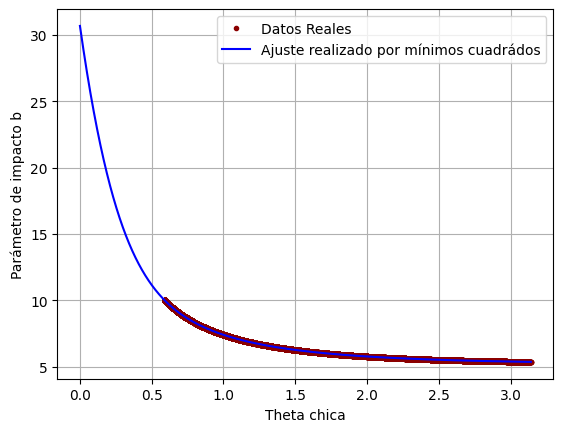

In [4]:
#se construye un sistema de ecuaciones lineales para un ajuste polinomico usando minimos cuadrados
#grado del polinomio es grad
def calcular_coeficientes(x, y, err, grad):
    n = grad
    #matriz A contiene potencias de x 
    A = np.zeros((n, n))
    #vector b contiene suma de productos de y & potencias de x 
    b = np.zeros(n)

    for i in range(n):
        for j in range(n):
            A[i, j] = 2*np.sum((x**(i+j))/err)
        b[i] = 2 * np.sum((y * x**i)/err)
    #resolver el sistema A*coef=b produciendo los coeficientes polinomiales    
    coef = np.linalg.solve(A, b)
    return coef

def evaluar_polinomio(coeficientes, x):
    y = np.zeros_like(x)
    for i in range(len(coeficientes)):
        y += coeficientes[i] * (x ** i)
    return y

#ajusta un polinomio de grado 13 a los puntos
coef_1 = calcular_coeficientes(theta_values_2, b_values_2,err,13)

#crea un array con 10000 puntos desde 0 hasta pi
x_2 = np.linspace(0,np.pi,10000)
#evalua el ajuste polinomico en estos puntos 
y_2 = evaluar_polinomio(coef_1,x_2)

plt.plot(theta_values_2, b_values_2 ,'.',label='Datos Reales', color='darkred')
plt.plot(x_2,y_2, label = 'Ajuste realizado por mínimos cuadrádos', color = 'b')
plt.xlabel('Theta chica')
plt.ylabel('Parámetro de impacto b')
plt.legend()
plt.grid()

In [5]:
def derivar_polinomio(coeficientes, x):
    """Calcula la derivada de un polinomio y la evalúa."""
    y_derivada = np.zeros_like(x)
    for i in range(1, len(coeficientes)):
        y_derivada += i * coeficientes[i] * (x ** (i - 1))
    return y_derivada

# Calcular la derivada del polinomio ajustado
y_derivada_2 = derivar_polinomio(coef_1, x_2)

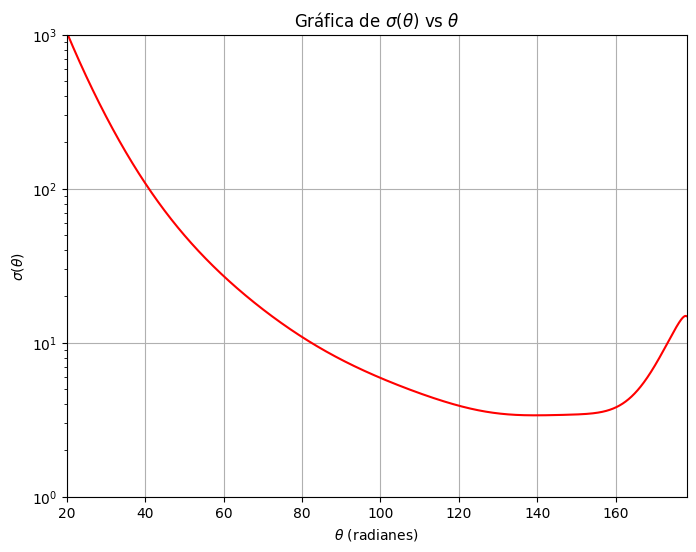

In [6]:
def dsigma_1(b, db, theta):
    ds = []
    theta_1 = []
    epsilon = 1e-10  # Umbral para evitar divisiones por valores muy pequeños
    for i in range(len(b)):
        if np.abs(np.sin(theta[i])) > epsilon and np.abs(db[i]) > epsilon:
            aux = b[i] / np.sin(theta[i]) * (np.abs(db[i]))
            ds.append(aux)
            theta_1.append(theta[i])
    return np.array(ds), np.array(theta_1)

dsigma_2, theta_2 = dsigma_1(y_2, y_derivada_2, x_2)
theta_2 = np.degrees(theta_2)

plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.plot(theta_2, dsigma_2, label=r'$\sigma(\theta)$ vs $\theta$', color='red')
plt.title(r'Gráfica de $\sigma(\theta)$ vs $\theta$')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$\sigma(\theta)$')
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.xlim(20,178)
plt.ylim(1,10e2)
plt.show()

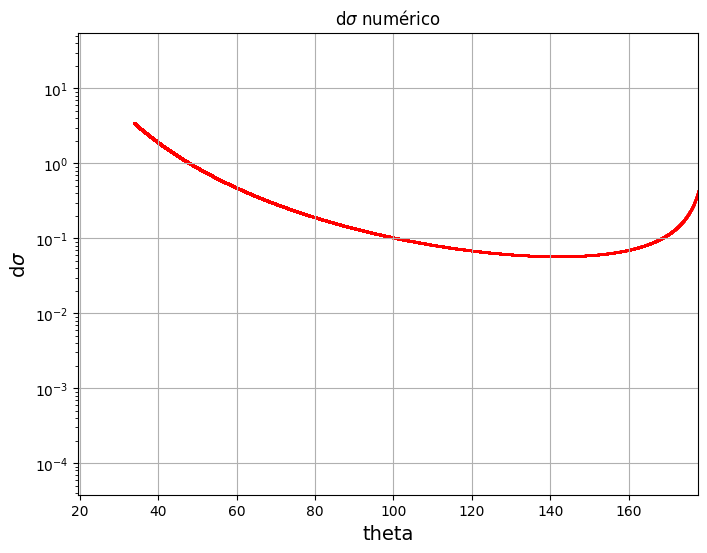

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir theta_values de radianes a grados
valores_theta = np.degrees(valores_theta)

# np.diff() calcula diferencia entre valores consecutivos de b y theta respectivamente
db_dtheta_values = np.abs(np.diff(valores_b) / np.diff(valores_theta))

# Array vacío para almacenar los sigmas
sigma_theta = []

# Para i de 1 hasta la longitud del array de theta_values
for i in range(1, len(valores_theta)):
    # Para que no se indetermine
    if np.sin(np.radians(valores_theta[i])) != 0:  # Convertir de nuevo a radianes para el cálculo
        # Cálculo de sigma(theta)
        sigma_value = (valores_b[i] / np.sin(np.radians(valores_theta[i]))) * db_dtheta_values[i - 1]
        # Se guarda el valor en el array
        sigma_theta.append(sigma_value)
    else:
        sigma_theta.append(0)

# Graficar sigma(theta) en función de theta
plt.figure(figsize=(8, 6))
plt.scatter(valores_theta[1:], sigma_theta, color='r', s=1)  # Empezamos en 1 para alinear con db_dtheta_values
plt.yscale('log')
plt.xlabel("theta", fontsize=14)
plt.ylabel("d$\sigma$ ", fontsize=14)
plt.grid(True)
plt.xlim(0.34* 180/np.pi, 3.10 * 180/np.pi)  # Ajustar el límite del eje x para grados (0, 3.5 radianes ≈ 200 grados)
plt.title("d$\sigma$ numérico")
plt.show()